<a href="https://colab.research.google.com/github/tithihalder9/TithiHalder23-ML_Lab_Code/blob/main/Q12_Iris_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Activation: sigmoid, Loss: mse, Optimizer: GD
Final Test Accuracy: 70.00%


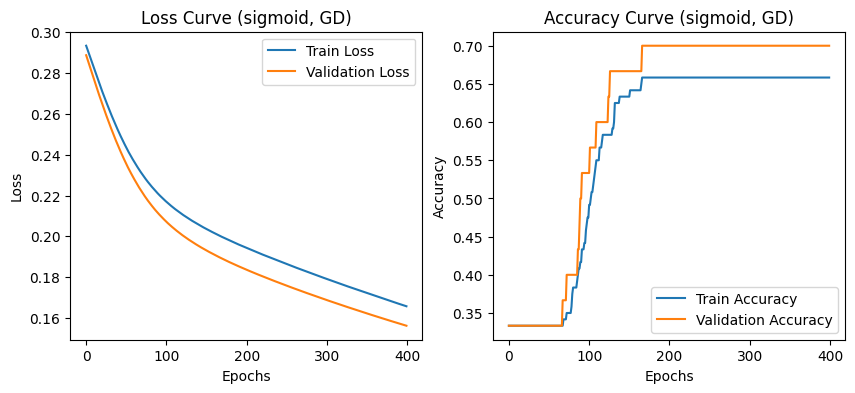


Sample trained weights (first layer):
[[ 0.64616585 -0.4174734   0.02526238  0.06746846 -0.3870044 ]
 [-0.6604444   0.35665727  0.86681503 -0.738872    0.7801853 ]
 [-0.05744093  0.55895144 -0.46791273  0.56181544 -0.50360084]
 [ 0.25397095 -0.68545234  0.50806504  0.11874114 -0.9242912 ]]

Activation: tanh, Loss: mse, Optimizer: SGD
Final Test Accuracy: 96.67%


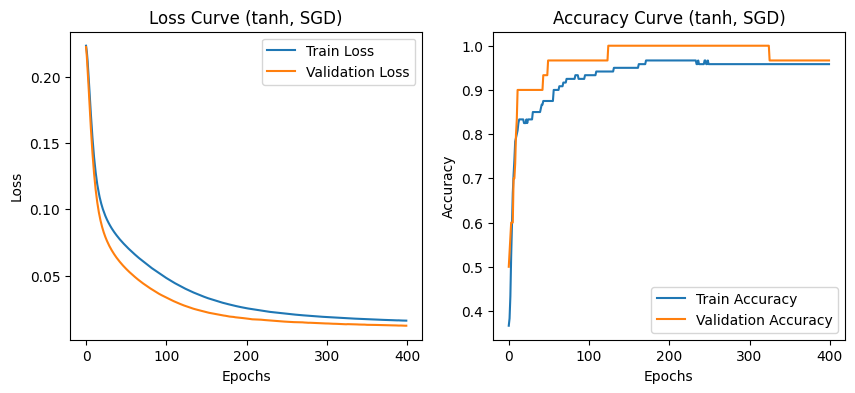


Sample trained weights (first layer):
[[ 1.1896331  -0.28290972 -0.16753764 -0.19675028 -0.15378274]
 [-0.8827519  -0.18278809  0.5762725  -0.37669104 -0.24827261]
 [ 0.329856    1.2284236  -0.06227165 -0.31602177  1.0711101 ]
 [-0.0423858   0.5219306  -1.1987921  -0.5336983   1.0222384 ]]

Activation: relu, Loss: categorical_crossentropy, Optimizer: Adam
Final Test Accuracy: 100.00%


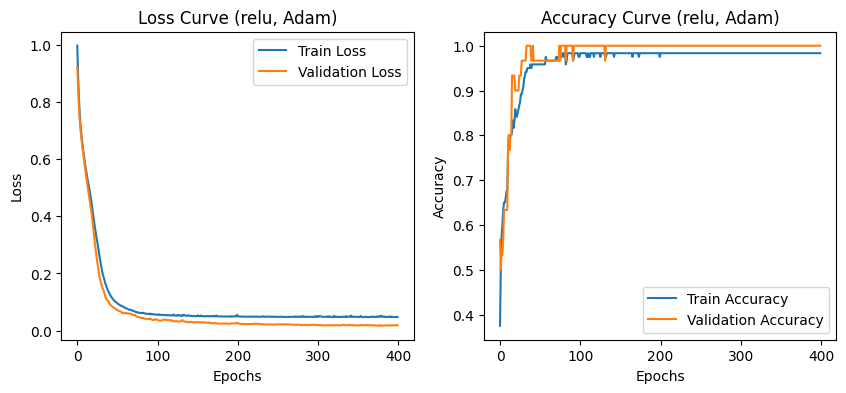


Sample trained weights (first layer):
[[-0.09927963  0.01429153  0.5195453   0.3949449  -1.212336  ]
 [ 0.6021662   0.25046602 -1.3751426  -0.10204555  0.79305106]
 [-1.2425832  -1.0765549   1.6560811  -0.8627947  -2.0514417 ]
 [-1.239245   -0.27150235  2.2931113  -0.950158   -1.252155  ]]


In [1]:
# ---------------------------------------
# MLP Neural Network on Iris Dataset
# ---------------------------------------

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam

# -----------------------------
# 1. Load and Prepare Dataset
# -----------------------------
iris = load_iris()
X = iris.data        # Features: sepal length, sepal width, petal length, petal width
y = iris.target.reshape(-1, 1)  # Labels: 0=setosa, 1=versicolor, 2=virginica

# One-hot encode the target values
encoder = OneHotEncoder(sparse_output=False)
y = encoder.fit_transform(y)

# Split dataset: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize feature values
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# -----------------------------
# 2. Function to Train Model
# -----------------------------
def train_mlp(activation_func, loss_func, optimizer_choice, lr=0.01, epochs=300):
    # Build MLP model
    model = Sequential([
        Dense(5, input_dim=4, activation=activation_func),   # 1 Hidden layer (5 neurons)
        Dense(3, activation='softmax')                       # Output layer (3 flower types)
    ])

    # Select optimizer
    if optimizer_choice == "GD":
        opt = SGD(learning_rate=lr)
    elif optimizer_choice == "SGD":
        opt = SGD(learning_rate=lr, momentum=0.9)
    else:
        opt = Adam(learning_rate=lr)

    # Compile model
    model.compile(optimizer=opt, loss=loss_func, metrics=['accuracy'])

    # Train model
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                        epochs=epochs, verbose=0)

    # Evaluate model
    loss, acc = model.evaluate(X_test, y_test, verbose=0)
    print(f"\nActivation: {activation_func}, Loss: {loss_func}, Optimizer: {optimizer_choice}")
    print(f"Final Test Accuracy: {acc*100:.2f}%")

    # Plot loss and accuracy curves
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Loss Curve ({activation_func}, {optimizer_choice})')
    plt.xlabel('Epochs'); plt.ylabel('Loss'); plt.legend()

    plt.subplot(1,2,2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'Accuracy Curve ({activation_func}, {optimizer_choice})')
    plt.xlabel('Epochs'); plt.ylabel('Accuracy'); plt.legend()
    plt.show()

    # Display some weights of first layer
    print("\nSample trained weights (first layer):")
    print(model.layers[0].get_weights()[0])

# -----------------------------
# 3. Train with Different Settings
# -----------------------------
configs = [
    ('sigmoid', 'mse', 'GD'),
    ('tanh', 'mse', 'SGD'),
    ('relu', 'categorical_crossentropy', 'Adam'),
]

for act, loss, opt in configs:
    train_mlp(act, loss, opt, lr=0.01, epochs=400)
